## Identifying Important Features in Random Forests

Feature importance in machine learning refers to a technique that assigns a score or importance value to each feature in a dataset. It helps identify which features have the most influence or predictive power in a given model. IN other words, by analyzing the feature importance scores, you can gain insights into which features have the most predictive power and potentially focus on those features for further analysis or feature selection.

Feature importance can be determined using various methods, such as random forest feature importance. In random forest the importance of the features can be accessed through the feature_importances_ attribute of scikit-learn. 

Problem

You need to know which features are most important in a random forest model.

Solution

Calculate and visualize the importance of each feature:


In [2]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn import datasets



In [3]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target


In [4]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1) 

In [5]:
# Train model
model = randomforest.fit(features, target) 

In [6]:
# Calculate feature importances
importances = model.feature_importances_

In [7]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [8]:
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

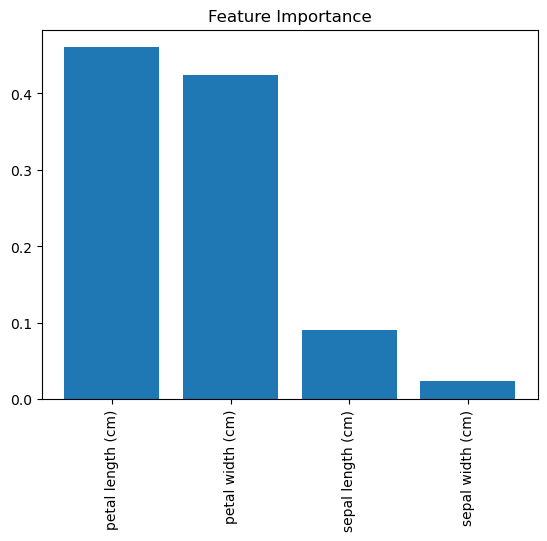

In [9]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance") 

# Add bars
plt.bar(range(features.shape[1]), importances[indices]) 

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90) 

# Show plot
plt.show()

There are two things to keep in mind regarding feature importance. First, scikit-learn requires that we break up nominal categorical features into multiple binary features. This has the effect of spreading the importance of that feature across all of the binary features and can often make each feature appear to be unimportant even when the original nominal categorical feature is highly important. Second, if two features are highly correlated, one feature will claim much of the importance, making the other feature appear to be far less important—which has implications for inter‐ pretation if not considered.

In scikit-learn, classification and regression decision trees and random forests can report the relative importance of each feature using the feature_importances_ method:

In [ ]:
# View feature importances
model.feature_importances_

The higher the number, the more important the feature (all importance scores sum to 1). By plotting these values we can add interpretability to our random forest models.